# Used Car Sales

## Company Background
Discount Motors is a used car dealership in the UK. They want to lead the way in used cars.Selling to customers who want the latest and greatest features, without the price tag of a brand new car.

The UK Government has now announced that from 2030 all new cars will be required to be
zero emissions. Although this won’t impact the used car market, it is expected that buyers will give more consideration to the future value of their cars. And petrol and diesel will likely have a much lower value after 2030.  


## Question
The head of datascience has asked you to answer the following:
- Can you help us estimate the price we should list a car for? The predict prices should be within 10% of the listed price.But as their team can only manage 30%, it is probably ok to show we are at least as good as that.



## Dataset
The sales team has pulled some data from the website listings from the last 6 months. The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| model                    | Character, the model of the car, 18 possible values.                                                                                      |
| year                            | Numeric, year of registration from 1998 to 2020.                                                                                                        |
| price                 | Numeric, listed value of the car in GBP.                                                                          |
| transmission                     | Character, one of "Manual", "Automatic", "Semi-Auto" or "Other"                                                                                                       |
| mileage                 | Numeric, listed mileage of the car at time of sale                                         |
| fuelType                      | Character, one of "Petrol", "Hybrid", "Diesel" or "Other"                                                                                                                         |
| tax                     | Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price depending on the age of the car.  |
| mpg          | Numeric, miles per gallon as reported by manufacturer.                                                                                                                      |
| engineSize | Numeric, listed engine size, one of 16 possible values                                                                              |                                                                                     |

## Data Validation

In [1]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Start coding here...
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
car_df = pd.read_csv('data/toyota.csv')
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [2]:
car_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


## Validating unique values in the car model

In [3]:
model_values = car_df["model"].nunique()
print(f"The model column has {model_values} unique values")

The model column has 18 unique values


## Checking if the year value is lesser than 1998 or greather than 2020

In [4]:
car_df[(car_df['year'] <1998) | (car_df['year'] >2020)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


## Validate transmission values

In [5]:
car_df.transmission.value_counts()

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

## Validate Fuel Type

In [6]:
car_df.fuelType.value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

## Validating values of the engine size

In [7]:
eng_values = car_df.engineSize.nunique()
print(f"The engine size column has {eng_values} possible values")



The engine size column has 16 possible values


## Checking the duplicate values and dropping the duplicates

In [8]:
duplicate_values = car_df.duplicated().sum()
print(f"There are {duplicate_values} duplicate values in the dataset")
car_df = car_df.drop_duplicates()

There are 39 duplicate values in the dataset



The dataset contains 6738 rows and 9 columns with no missing values and 39 duplicate values before cleaning. I have validated all the columns against the criteria in the dataset table:

- **model**: Same as description. The column contains 18 possible values.
- **year**: Same as description. The column contains the year of registration from 1998 to 2020.
- **price**: Same as description.
- **transmission**: Same as description. The column values are "Manual", "Automatic", "Semi-Auto" or "Other"
- **mileage**:Same as description
- **fuelType**: Same as description.The column values are "Petrol", "Hybrid", "Diesel" or "Other".  
- **tax**:Same as description.
- **mpg** :Same as description.
- **engineSize** : Same as description.The column contains 16 possible values 
- **After the data validation, the dataset contains 6699 rows and 9 columns.**



## Exploratory Data Analysis

In [9]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data
car_df.describe()


,year,price,mileage,tax,mpg,engineSize
count,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000
mean,2016.742797,12529.799074,22889.588745,94.549933,63.078728,1.471996
std,2.205271,6358.562625,19109.288501,73.942649,15.861037,0.435624
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8266.500000,9488.500000,0.000000,55.400000,1.000000
50%,2017.000000,10798.000000,18571.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31059.500000,145.000000,70.600000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


#### Univariate Data Analysis

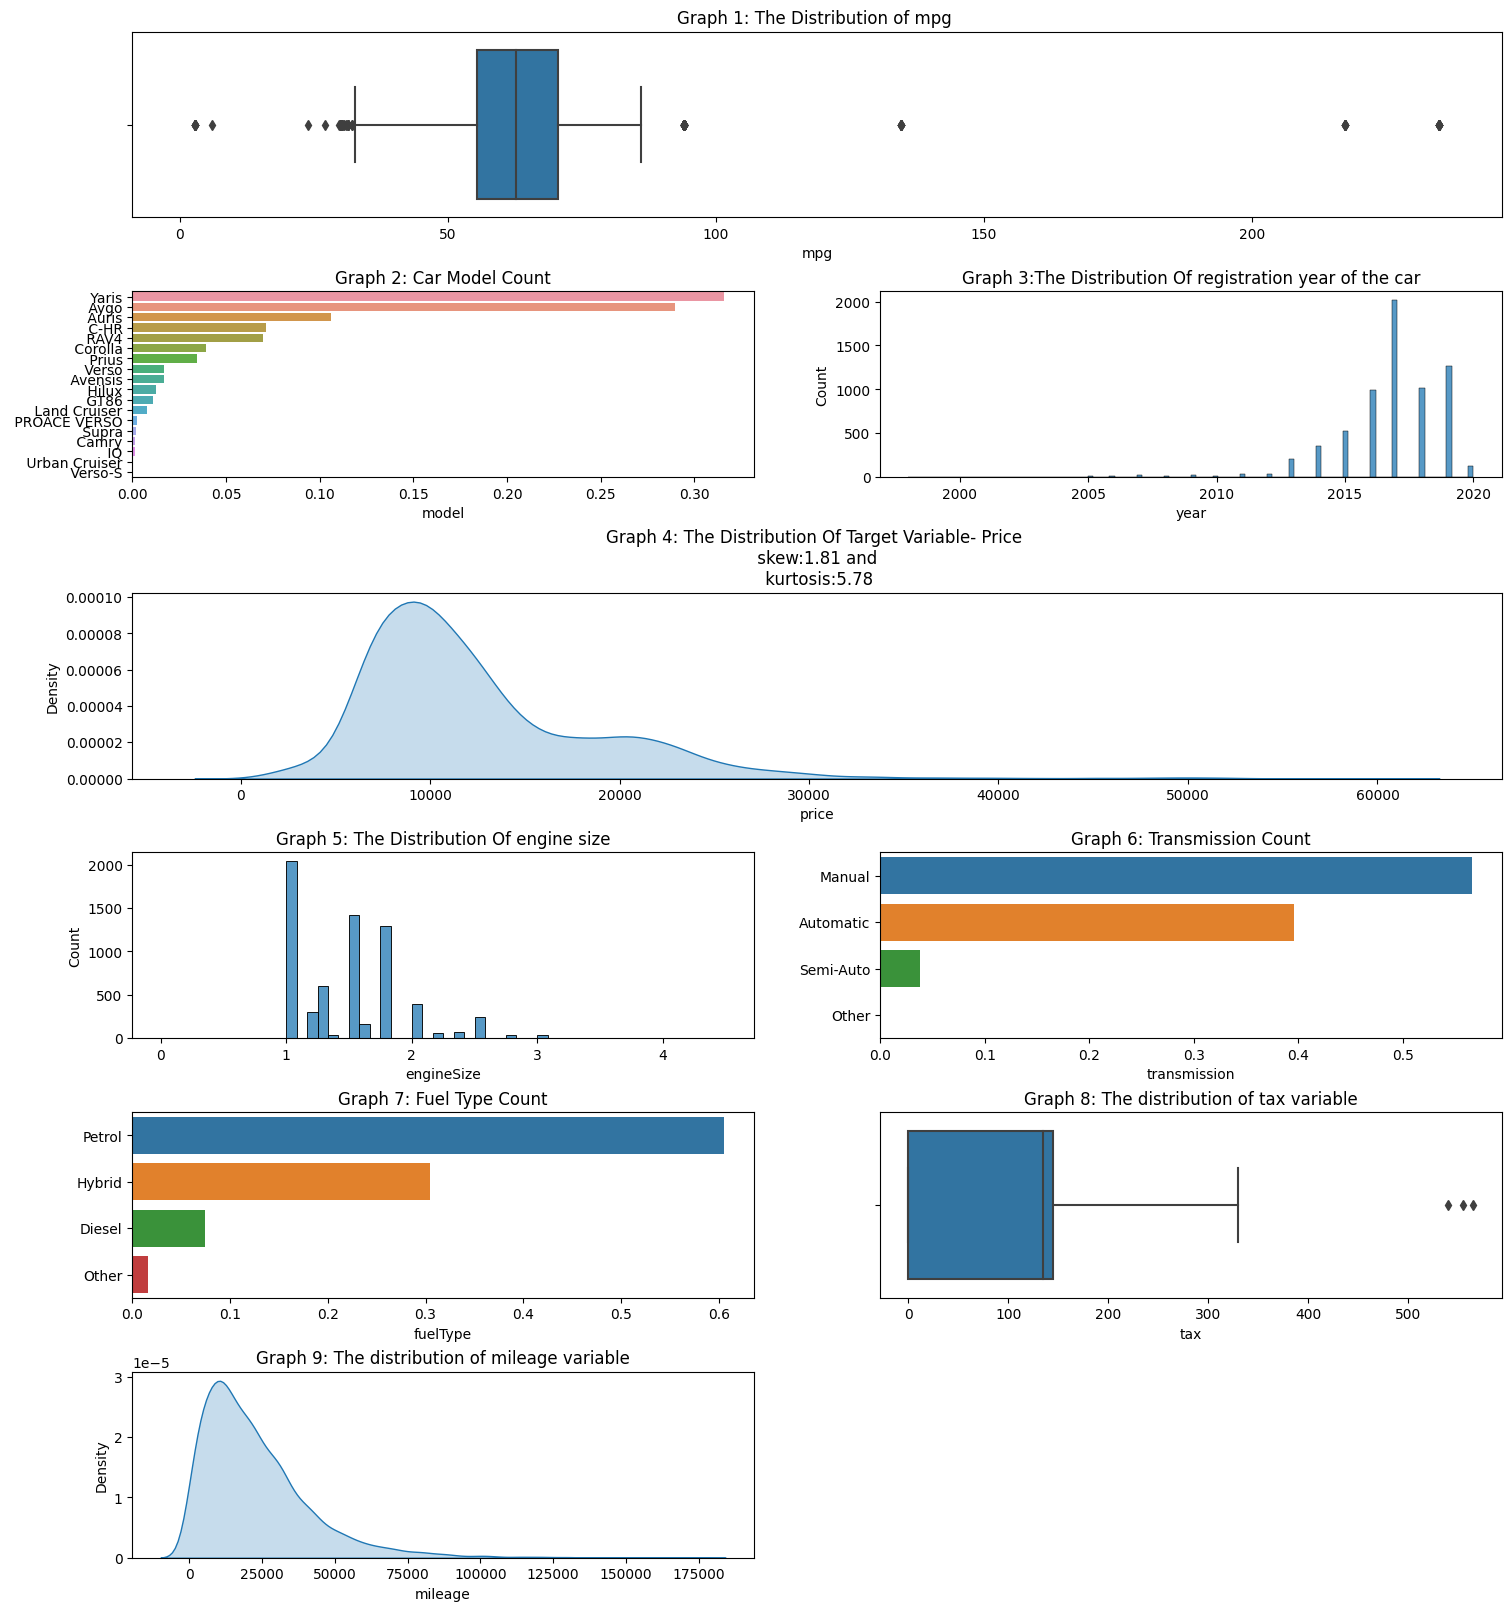

In [10]:
norm_count_car_model = car_df["model"].value_counts(normalize=True)
norm_count_trans = car_df["transmission"].value_counts(normalize=True)
norm_count_fuel = car_df["fuelType"].value_counts(normalize=True)
norm_count_engine = car_df["engineSize"].value_counts(normalize=True)

fig = plt.figure(figsize=(15, 16), constrained_layout=True)
spec = fig.add_gridspec(6, 2)
ax0 = fig.add_subplot(spec[0, :])

## Analyzing the distribution of the mpg variable
sns.boxplot(x='mpg',data=car_df,ax=ax0).set(title='Graph 1: The Distribution of mpg ')
ax1 = fig.add_subplot(spec[1,0])

## Analyzing the distribution of the variable "model"
sns.barplot(x=norm_count_car_model,y=norm_count_car_model.index ,data=car_df,ax=ax1).set(title='Graph 2: Car Model Count')
ax2 = fig.add_subplot(spec[1,1])

## Analyzing the distribution of the variable "year"
sns.histplot(x='year',data=car_df,ax=ax2).set(title='Graph 3:The Distribution Of registration year of the car')
ax3 = fig.add_subplot(spec[2,:])

## Analyzing the distribution of the target variable "price"
skew = car_df['price'].skew()
kurt = car_df['price'].kurtosis()
sns.kdeplot(x='price',data=car_df,shade=True,ax=ax3).set(title='Graph 4: The Distribution Of Target Variable- Price \n skew:{} and \n kurtosis:{}'.format(round(skew,2),round(kurt,2)))
ax4 = fig.add_subplot(spec[3,0])

## Analyzing the distribution of the variable "engine"
sns.histplot(x='engineSize',data=car_df,ax=ax4).set(title='Graph 5: The Distribution Of engine size')
ax5 = fig.add_subplot(spec[3,1])

## Analyzing the distribution of the variable "transmission" 
sns.barplot(x=norm_count_trans,y=norm_count_trans.index,data=car_df,ax=ax5).set(title='Graph 6: Transmission Count')
ax6 = fig.add_subplot(spec[4,0])

## Analyzing the distribution of the variable "fuel type"
sns.barplot(x=norm_count_fuel,y=norm_count_fuel.index,data=car_df,ax=ax6).set(title='Graph 7: Fuel Type Count')
ax7 = fig.add_subplot(spec[4,1])

## Analyzing the distribution of the variable "tax"
sns.boxplot(x='tax',data=car_df,ax=ax7).set(title = 'Graph 8: The distribution of tax variable')
ax8 = fig.add_subplot(spec[5,0])

## Analyzing the distribution of the variable "mileage"
sns.kdeplot(x='mileage',data=car_df,ax=ax8,shade=True).set(title = 'Graph 9: The distribution of mileage variable')
plt.show()



#### Insights:

- **Graph 1**: The median for the variable "mpg" is 62.8. We can see many outliers in the distribution. There are outliers both on the left and right of the boxplot.
- **Graph 2**: We can see that the maximum number of cars are of the model "Yaris" and there are just 3 entries of the model "Verso-S"
- **Graph 3**: In 2017, the maximum number of cars were registered. 
- **Graph 4**: The target variable "price" is right-skewed with the skew value of 1.81 and kurtosis of 5.78.
- **Graph 5**: It seems that there are more car listings with an engine size of less than 2 in comparison to engine sizes greater than 2
- **Graph 6**: In the dataframe, 57% of the cars are of the transmission type "Manual" followed by the transmission type "Automatic" 
- **Graph 7**: In the dataframe,60% of the cars are of the fuel type "Petrol".
- **Graph 8**: There are outliers on the right of the boxplot of the "tax" variable.
- **Graph 9**: The distribution of the variable "mileage" is right skewed

#### Bivariate Data Analysis

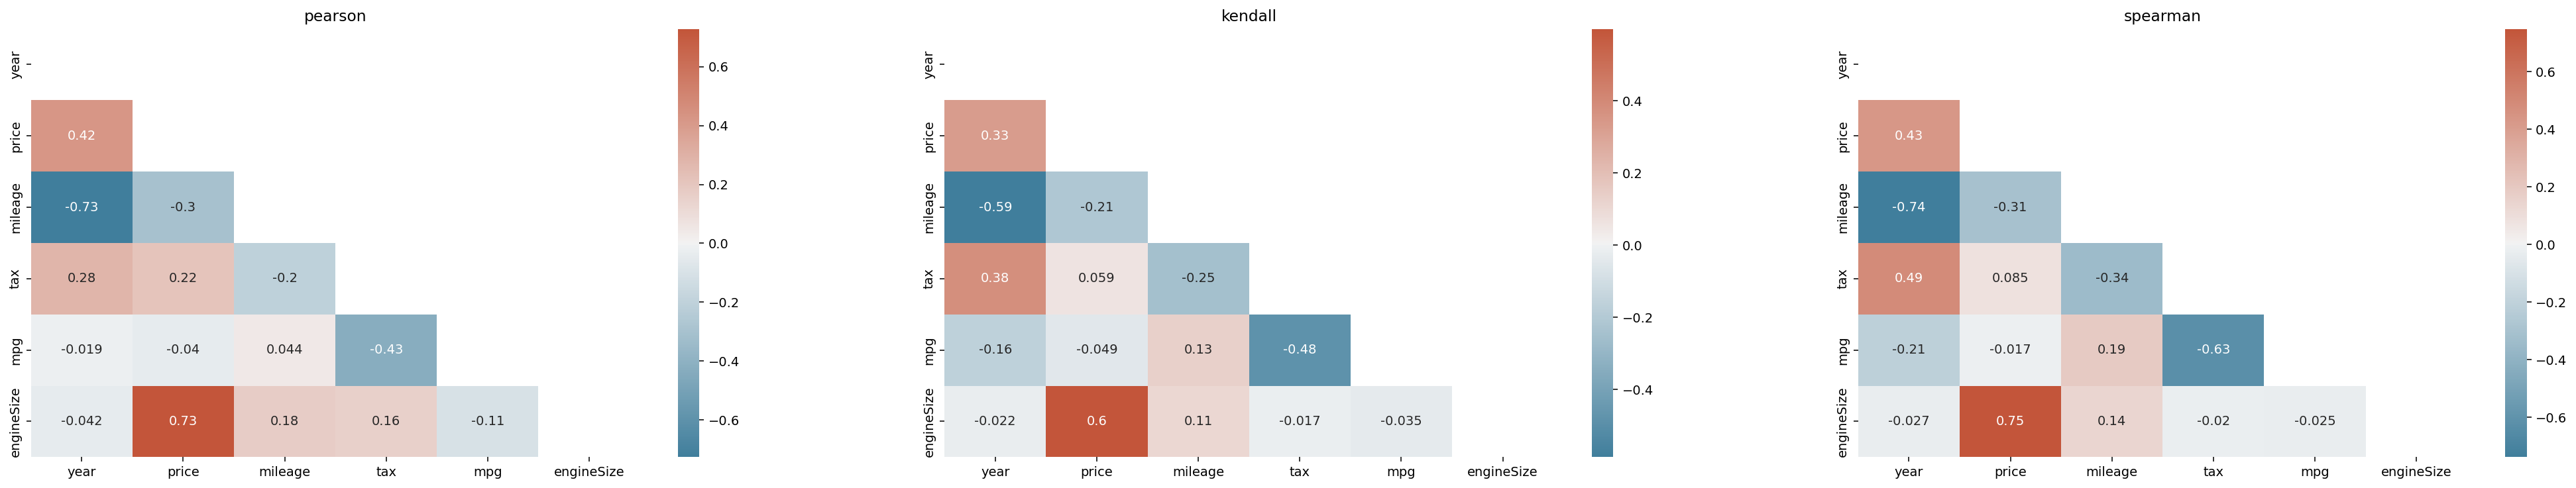

In [11]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    # Generate a mask for upper traingle
    correlation = car_df.corr(method=i)
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
     # Draw the heatmap
    sns.heatmap(correlation, annot=True, mask = mask, cmap=cmap).set(title=i)


I have tried three correlation methods. From "Pearson" and "Spearman" correlation plot, it seems that variables "price" and "engineSize" have a low negative correlation. There is a strong negative correlation between variables "price" and "mileage".

## Bivariate Data Analysis

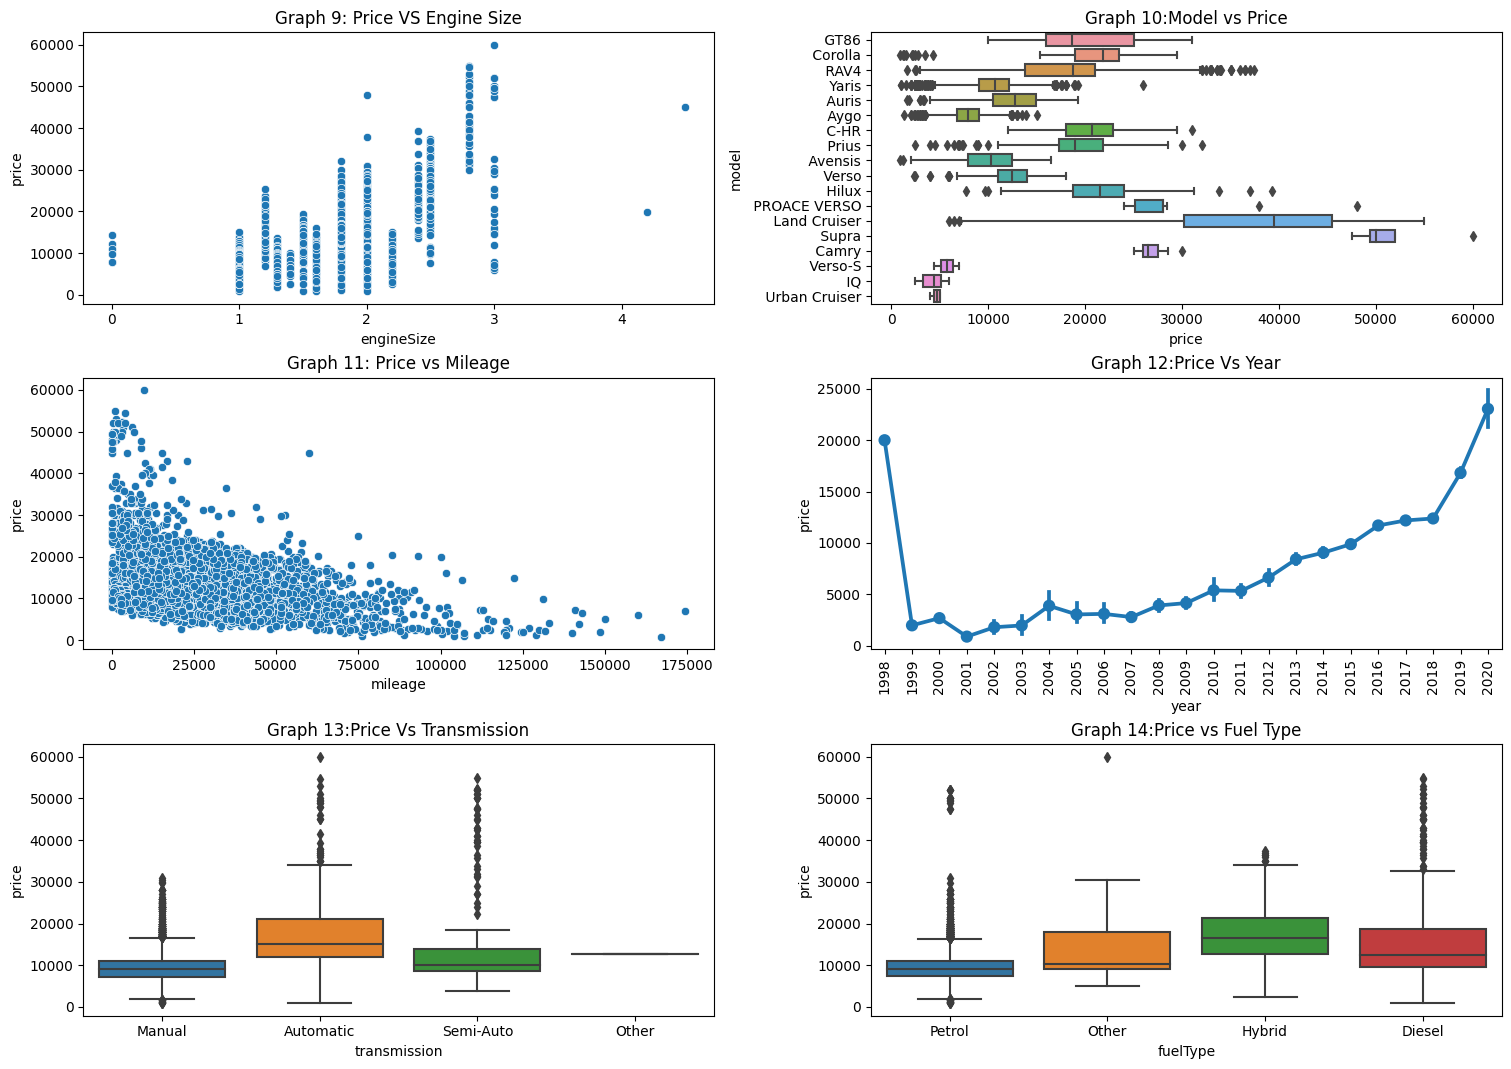

In [12]:
fig = plt.figure(figsize=(15, 16), constrained_layout=True)
spec = fig.add_gridspec(5, 2)
ax0 = fig.add_subplot(spec[0, 0])
sns.scatterplot(x='engineSize',y='price',data=car_df,ax=ax0).set(title="Graph 9: Price VS Engine Size")
ax1 = fig.add_subplot(spec[0,1])
sns.boxplot(x="price",y="model",data=car_df,ax=ax1).set(title = "Graph 10:Model vs Price")
ax2 = fig.add_subplot(spec[1,0])
sns.scatterplot(x="mileage",y="price",data=car_df,ax=ax2).set(title="Graph 11: Price vs Mileage")
ax3 = fig.add_subplot(spec[1,1])
sns.pointplot(x="year",y="price",data=car_df,ax=ax3).set(title="Graph 12:Price Vs Year")
plt.xticks(rotation = 90) 
ax4 = fig.add_subplot(spec[2,0])
sns.boxplot(x="transmission",y="price",data=car_df,ax=ax4).set(title="Graph 13:Price Vs Transmission")
ax5 = fig.add_subplot(spec[2,1])
sns.boxplot(x='fuelType',y='price',data=car_df,ax=ax5).set(title="Graph 14:Price vs Fuel Type")
plt.show()

#### Insights

- **Graph 9**: It seems that the price of the car has a strong correlation with the engine size of the car.
- **Graph 10**: It seems that the car model"Supra" has the maximum median price but as there are only 12 entries in the dataframe for this model, the result is not robust.
- **Graph 11**: It seems that the variable "price" has a negative correlation with the variable mileage.
- **Graph 12**: It seems that the cars registered in the year 2020 have the maximum average price. The second maximum average price is of the car registered in the year 1998 but there is only one entry for this year. We can't trust it for making an assumption. 
- **Graph 13**: It seems that the automatic transmission cars have the maximum median price.
- **Graph 14**: It seems that the cars with the fuel type as "Hybrid" has the maximum median price and the cars with fuel type "Petrol" has the minimum median price.

#### Multivariate Data Analysis

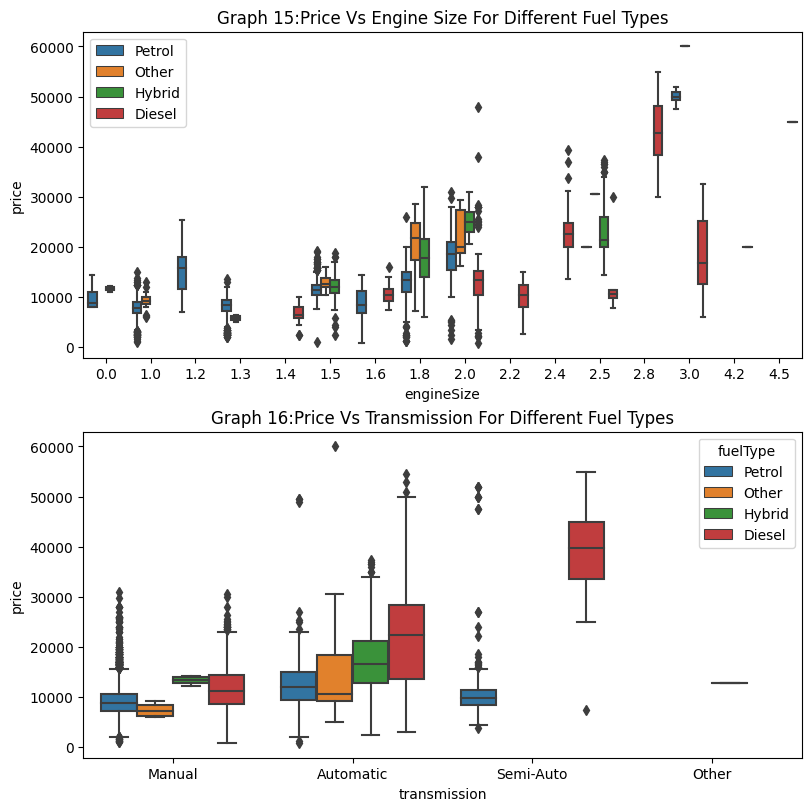

In [13]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
spec = fig.add_gridspec(2, 2)
ax0 = fig.add_subplot(spec[0, :])
sns.boxplot(x="engineSize",y="price",hue= "fuelType",data=car_df,ax=ax0).set(title="Graph 15:Price Vs Engine Size For Different Fuel Types")
plt.legend(loc='upper left')
ax1 = fig.add_subplot(spec[1, :])
sns.boxplot(x='transmission',y='price',hue='fuelType',data=car_df,ax=ax1).set(title="Graph 16:Price Vs Transmission For Different Fuel Types")
plt.show()

#### Insights

- **Graph 15**: It seems that the cars with the fuel type "Petrol" have an engine of small size and the cars with the fuel type "Diesel" have a big engine size.
- **Graph 16**: The median price for the fuel type "Diesel" is more in "Automatic" and "Semi-Auto" cars."Semi-Auto" cars have the fuel type "Petrol" and "Diesel".

## Building The Model

In [14]:
features = car_df.drop(columns=['price'])
X = pd.get_dummies(features,columns=['model','transmission','fuelType'])
y= car_df['price']

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6699 entries, 0 to 6737
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    6699 non-null   int64  
 1   mileage                 6699 non-null   int64  
 2   tax                     6699 non-null   int64  
 3   mpg                     6699 non-null   float64
 4   engineSize              6699 non-null   float64
 5   model_ Auris            6699 non-null   uint8  
 6   model_ Avensis          6699 non-null   uint8  
 7   model_ Aygo             6699 non-null   uint8  
 8   model_ C-HR             6699 non-null   uint8  
 9   model_ Camry            6699 non-null   uint8  
 10  model_ Corolla          6699 non-null   uint8  
 11  model_ GT86             6699 non-null   uint8  
 12  model_ Hilux            6699 non-null   uint8  
 13  model_ IQ               6699 non-null   uint8  
 14  model_ Land Cruiser     6699 non-null   

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.20)

# Fit the scaler to the data
scaler.fit(X_train)

# Transform the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Finally, to enable model fitting and creating a model with better performance, I have made the following changes:
- Converted all the categorical variables into numeric variables.
- Scaled the data using Robust Scaler.




## Model Fitting

#### Method 1: Linear Regression With Grid Search CV

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Create the model
model_linReg = LinearRegression()

# Define the hyperparameter grid
param_grid_lin = {'fit_intercept':[True,False],'normalize': [True, False]}

# Create the grid search object
grid_search_linReg = GridSearchCV(estimator = model_linReg, 
                                  param_grid = param_grid_lin, 
                                  scoring=["r2","neg_root_mean_squared_error"],
                                  refit="r2",
                                  cv=10)

# Fit the model to the training data
grid_search_linReg.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f"Linear Regression Model Best Parameters: {grid_search_linReg.best_params_}")
print(f"Linear Regression Model Best Score: {grid_search_linReg.best_score_}")

# Make predictions on the test data
y_pred_linReg = grid_search_linReg.predict(X_test_scaled)

Linear Regression Model Best Parameters: {'fit_intercept': True, 'normalize': False}
Linear Regression Model Best Score: 0.9232012267534468


#### Method 2: Lasso Regression with Grid Search CV

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the lasso regression model
lasso = Lasso()

# Create the grid search object
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=10)

# Fit the grid search object to the training data
grid_search_lasso.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print(grid_search_lasso.best_params_)
print(grid_search_lasso.best_score_)

# Make predictions on the test data
y_pred_lasso = grid_search_lasso.predict(X_test_scaled)

{'alpha': 0.01}
0.9232026992511677


#### Method 3: XGBRegressor with GridSearchCV


In [19]:
import xgboost as xgb


# Create the model
model_xgb = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid_xgb = {'max_depth': [3,5,7, 9],
                    'n_estimators': [50, 100, 200],
                    'gamma':[0.01,0.1],
                    'learning_rate':[0.001,0.01,0.1]}

# Create the grid search object
grid_search_xgb = GridSearchCV(estimator = model_xgb, 
                           param_grid = param_grid_xgb, 
                           scoring=["r2","neg_root_mean_squared_error"],
                           refit="r2",
                           cv=10)

# Fit the model to the training data
grid_search_xgb.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f"XGBoost Best Parameters: {grid_search_xgb.best_params_}")
print(f"XGBoost Best Score: {grid_search_xgb.best_score_}")

# Make predictions on the test data
y_pred_xgb = grid_search_xgb.predict(X_test_scaled)


XGBoost Best Parameters: {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost Best Score: 0.9632092916693613


Predicting the price of old cars is a regression problem. I have chosen **Linear Regression Model** as the baseline model because it is very efficient to train and interpret. For the comparison model, I have chosen the **XGBoost regression model** and **Lasso Regression Model**. I have used Grid Search Cross Validation to tune the hyperparameters and improve the score of the model.

## Model Evaluation

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score_linReg = r2_score(y_test, y_pred_linReg)
r2_score_xgb = r2_score(y_test, y_pred_xgb)
r2_score_lasso = r2_score(y_test,y_pred_lasso)
mse_linReg = mean_squared_error(y_test, y_pred_linReg)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"The score for linear regression model is : {r2_score_linReg} and the mean squared error is :{mse_linReg}")
print(f"The score for XGBoost Regression model is :{r2_score_xgb} and the mean squared error is : {mse_xgb}")
print(f"The score for Lasso Regression model is :{r2_score_lasso} and the mean squared error is : {mse_lasso}")

 

The score for linear regression model is : 0.931815074049163 and the mean squared error is :2822739.836206567
The score for XGBoost Regression model is :0.973985088728243 and the mean squared error is : 1076973.031181627
The score for Lasso Regression model is :0.9317836971885854 and the mean squared error is : 2824038.784809243


I am choosing the R2 score and the mean squared error to evaluate the model performance. The R2 score for the linear regression model, xgboost regression model, and lasso regression model is 0.93,0.97, and 0.93. All the models have a good score. The score of the xgboost regression model is slightly better. The mean squared error is also the minimum for the XGBoost regression model. It means that the XGBoost Regression model is more accurate in predicting the price of old cars.

From this metric, we can conclude that the XGBoost Regression model has a higher chance of that prediction being correct.



## Evaluating whether the predicted price by XGBoost Model is within 10% of the listed price 

In [23]:
listed_price = np.array(y_test)
predicted_price = np.array(y_pred_xgb)
percentage_diff = np.absolute(predicted_price - listed_price)*100/listed_price
print(f"On average the difference between the predicted price and the listed price is {percentage_diff.mean()}% of the listed price" )

perc_diff_df = pd.DataFrame({'listedPrice':listed_price,'predictedPrice':predicted_price,'percDiff':percentage_diff})

cars_within_10 = perc_diff_df[perc_diff_df['percDiff']<= 10]
perc_listed_corectly = cars_within_10.shape[0]*100/perc_diff_df.shape[0]
print(f"Out of total cars,the price of {perc_listed_corectly}% of the cars is predicted within 10% of the listed price" )

cars_within_30 = perc_diff_df[perc_diff_df['percDiff']<= 30]
perc_listed_within_30 = cars_within_30.shape[0]*100/perc_diff_df.shape[0]
print(f"Out of total cars,the price of {perc_listed_within_30}% of the cars is predicted within 30% of the listed price" )

On average the difference between the predicted price and the listed price is 5.961263737778393% of the listed price
Out of total cars,the price of 82.08955223880596% of the cars is predicted within 10% of the listed price
Out of total cars,the price of 99.4776119402985% of the cars is predicted within 30% of the listed price


## Business Metric

Our goal is to predict the price of the used cars within 10% of the listed price. I recommend that we use the percentage of cars predicted within 10% of the listed price as a metric. From Graph 17, we can see that the predicted price of 82% of the cars is within 10% of the listed price. From this metric, we can conclude that the XGBoost model can be used for predicting the price of used cars and helping the business to sell cars quicker.



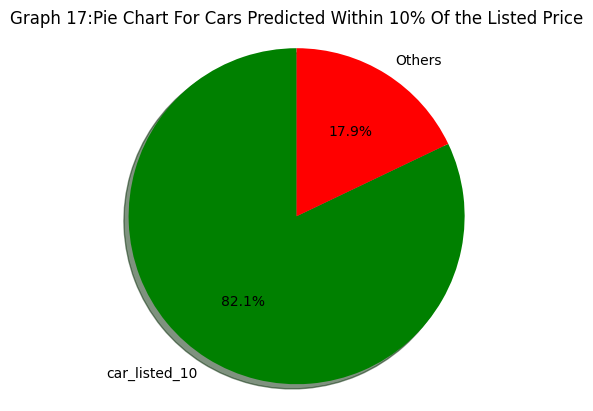

In [22]:
list_dict ={}
list_dict['car_listed_10'] = perc_listed_corectly
list_dict['Others'] = 100 - perc_listed_corectly
colors = ['green', 'red']
plt.pie(list(list_dict.values()), labels=list_dict.keys(), colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Graph 17:Pie Chart For Cars Predicted Within 10% Of the Listed Price")
plt.show()

## Business Recommendations

1. The XGBoost Regression model should be selected and deployed to predict the price of the used cars.
2. More data should be collected so that the result is more robust. The data should be collected for hybrid and electric vehicles because the UK government has stated that all new cars must be zero-emissions by 2030. 


## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam